In [1]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer
from credit_card_segmentation.data.custom import preprocess_training_set, load_data

In [2]:
df = load_data("/Users/josephobukofe/credit_card_segmentation/data/raw/CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.shape

(8950, 18)

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
print('Duplicated Rows: %s'%df.duplicated().sum()) 

Duplicated Rows: 0


In [9]:
df.nunique().sort_values(ascending = False)

CUST_ID                             8950
BALANCE                             8871
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PURCHASES                           6203
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
ONEOFF_PURCHASES                    4014
CREDIT_LIMIT                         205
PURCHASES_TRX                        173
CASH_ADVANCE_TRX                      65
CASH_ADVANCE_FREQUENCY                54
PRC_FULL_PAYMENT                      47
PURCHASES_INSTALLMENTS_FREQUENCY      47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_FREQUENCY                   47
BALANCE_FREQUENCY                     43
TENURE                                 7
dtype: int64

Univariate Analysis

In [10]:
sns.set_style('whitegrid')

Amount of Payments

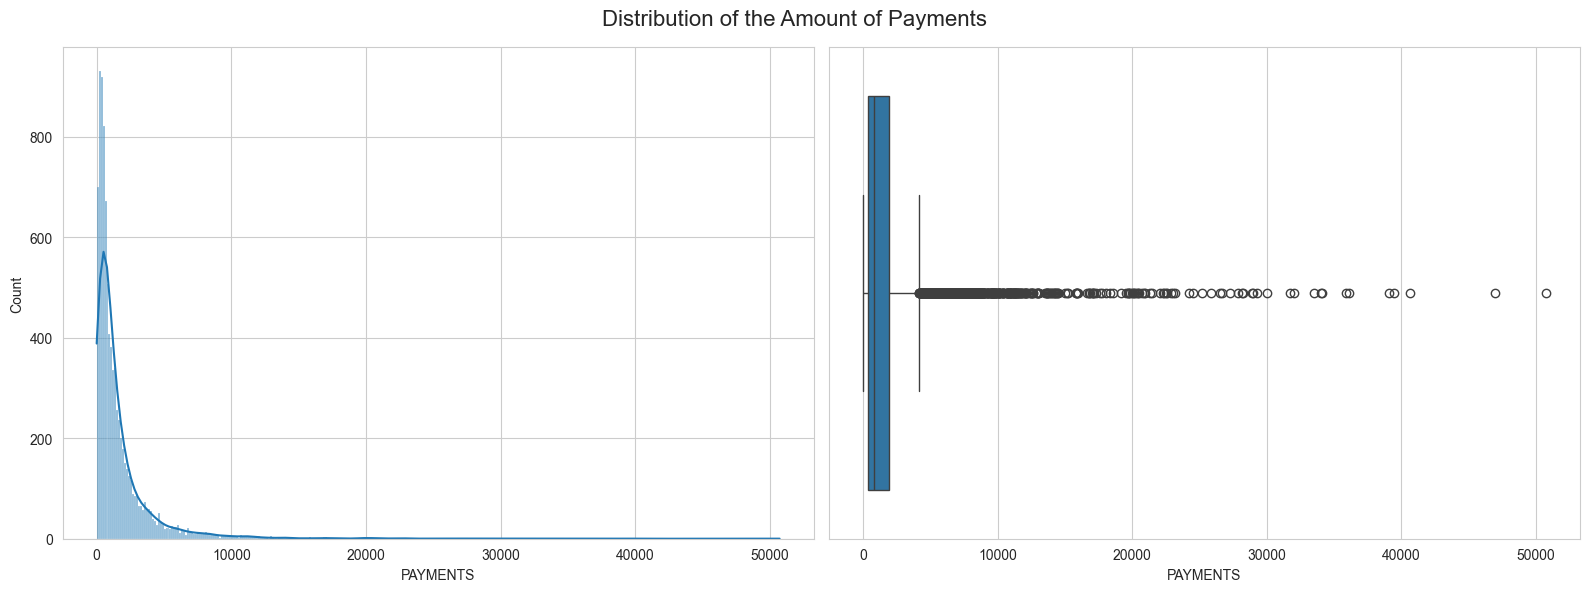

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the Amount of Payments', fontsize=16)

sns.histplot(data=df, x = "PAYMENTS", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PAYMENTS", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [12]:
zero_payment_values = df["PAYMENTS"] == 0
zero_payment_occurence = zero_payment_values.any()
print(zero_payment_occurence)

True


In [13]:
zero_payment_values_count = df["PAYMENTS"] == 0
zero_payment_values_sum = zero_payment_values_count.sum()
print(f"Number of zero values: {zero_payment_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_payment_values_sum/df.shape[0]) * 100:.2f}%") 

Number of zero values: 240
Number of rows: 8950
Percentage of zero values: 2.68%


Amount of Minimum Payments

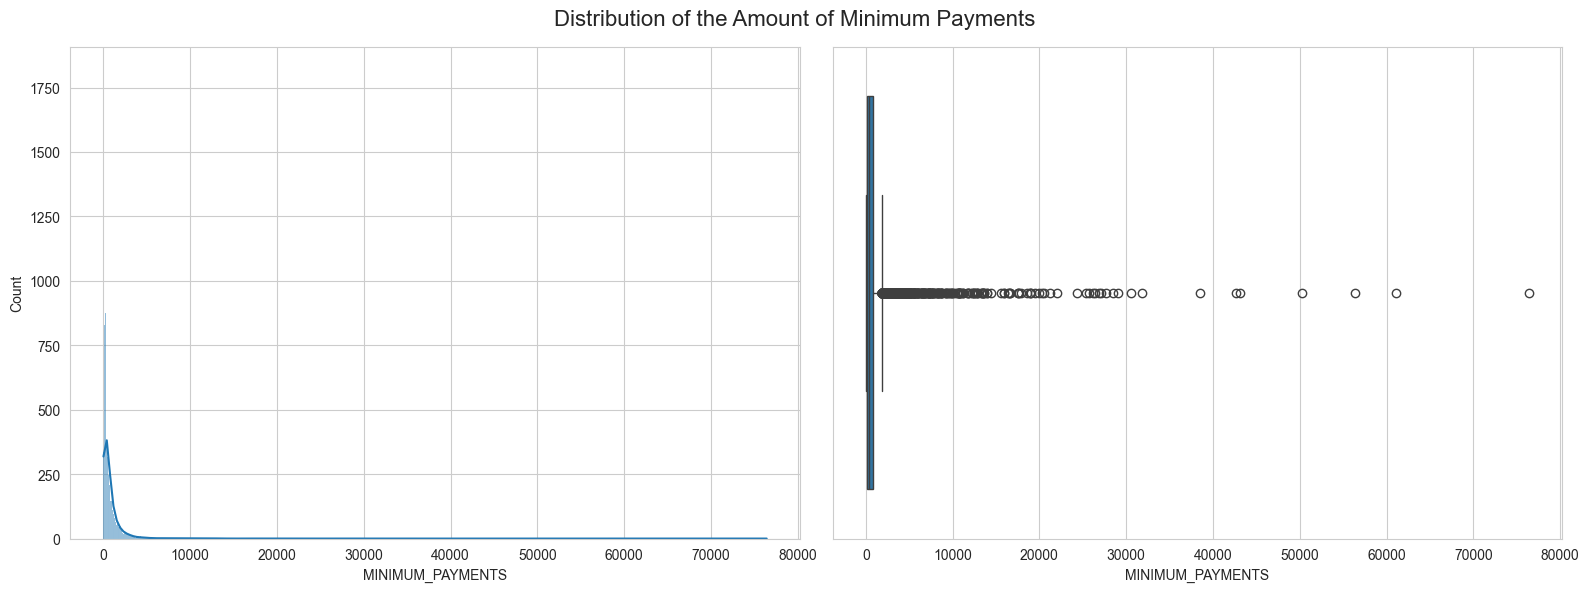

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the Amount of Minimum Payments', fontsize=16)

sns.histplot(data=df, x = "MINIMUM_PAYMENTS", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "MINIMUM_PAYMENTS", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [15]:
zero_min_payment_values = df["MINIMUM_PAYMENTS"] == 0
zero_min_payment_occurence = zero_min_payment_values.any()
print(zero_min_payment_occurence)

False


In [16]:
zero_min_payment_values_count = df["MINIMUM_PAYMENTS"] == 0
zero_min_payment_values_sum = zero_min_payment_values_count.sum()
print(f"Number of zero values: {zero_min_payment_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_min_payment_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 0
Number of rows: 8950
Percentage of zero values: 0.00%


Balance in the bank accounts of customers

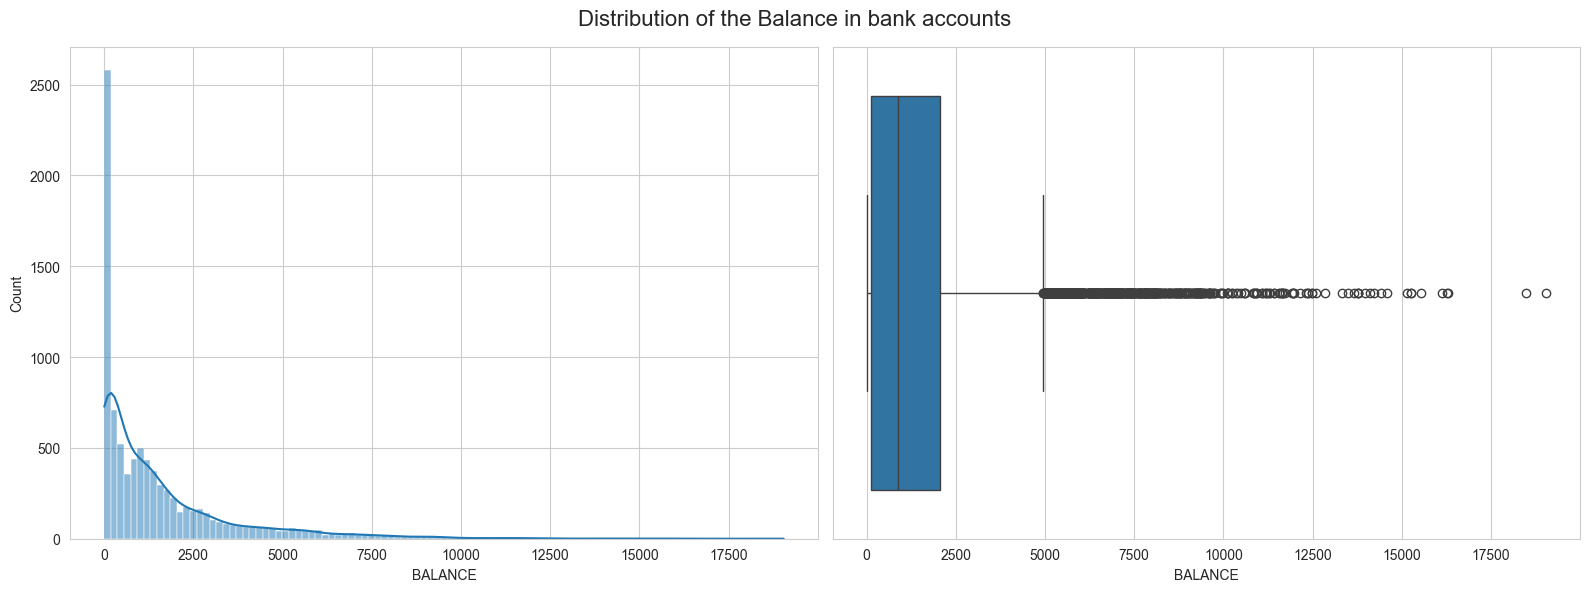

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the Balance in bank accounts', fontsize=16)

sns.histplot(data=df, x = "BALANCE", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "BALANCE", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [18]:
zero_balance_values = df["BALANCE"] == 0
zero_balance_occurence = zero_balance_values.any()
print(zero_balance_occurence)

True


In [19]:
zero_balance_values_count = df["BALANCE"] == 0
zero_balance_values_sum = zero_balance_values_count.sum()
print(f"Number of zero values: {zero_balance_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_balance_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 80
Number of rows: 8950
Percentage of zero values: 0.89%


The number of purchases made

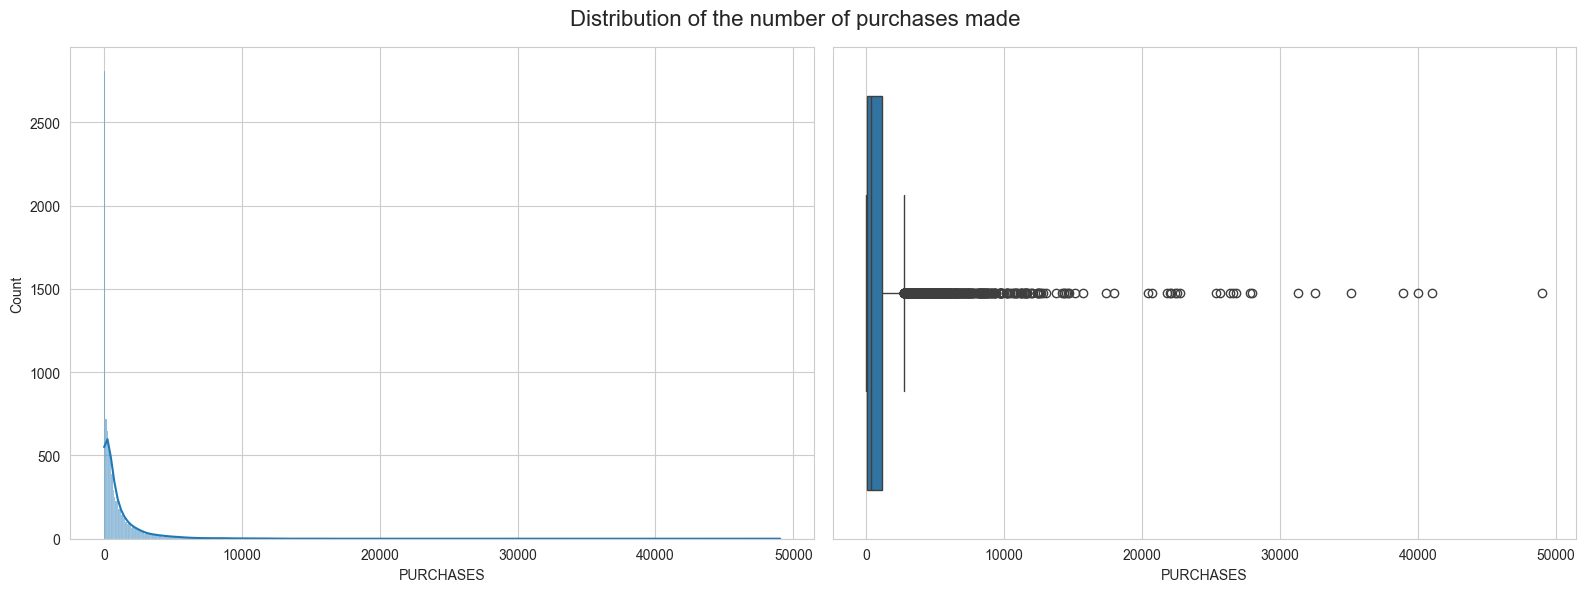

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the number of purchases made', fontsize=16)

sns.histplot(data=df, x = "PURCHASES", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PURCHASES", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [21]:
zero_purchases_values = df["PURCHASES"] == 0
zero_purchases_occurence = zero_purchases_values.any()
print(zero_purchases_occurence)

True


In [22]:
zero_purchases_values_count = df["PURCHASES"] == 0
zero_purchases_values_sum = zero_purchases_values_count.sum()
print(f"Number of zero values: {zero_purchases_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_purchases_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 2044
Number of rows: 8950
Percentage of zero values: 22.84%


The number of installment purchases made

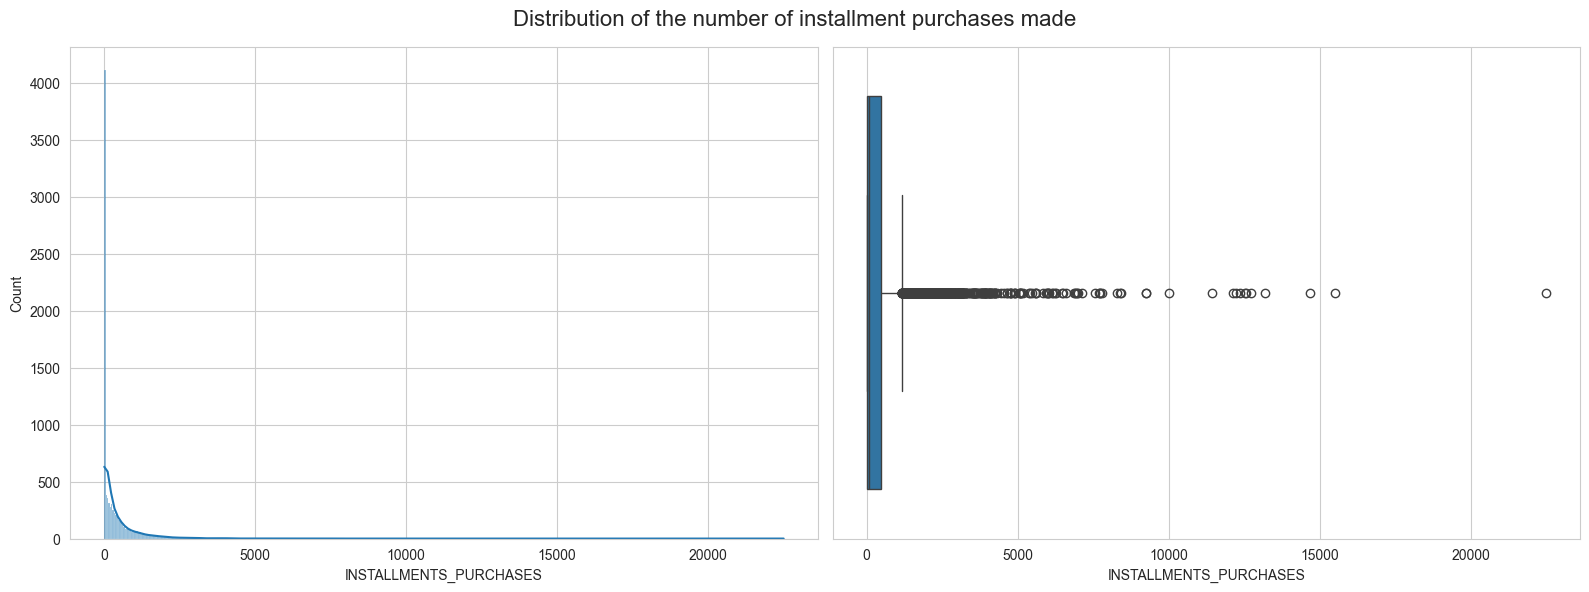

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the number of installment purchases made', fontsize=16)

sns.histplot(data=df, x = "INSTALLMENTS_PURCHASES", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "INSTALLMENTS_PURCHASES", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [24]:
zero_installments_purchases_values = df["INSTALLMENTS_PURCHASES"] == 0
zero_installments_purchases_occurence = zero_installments_purchases_values.any()
print(zero_installments_purchases_occurence)

True


In [25]:
zero_installments_purchases_values_count = df["INSTALLMENTS_PURCHASES"] == 0
zero_installments_purchases_values_sum = zero_installments_purchases_values_count.sum()
print(f"Number of zero values: {zero_installments_purchases_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_installments_purchases_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 3916
Number of rows: 8950
Percentage of zero values: 43.75%


Cash in advance paid by the customer 

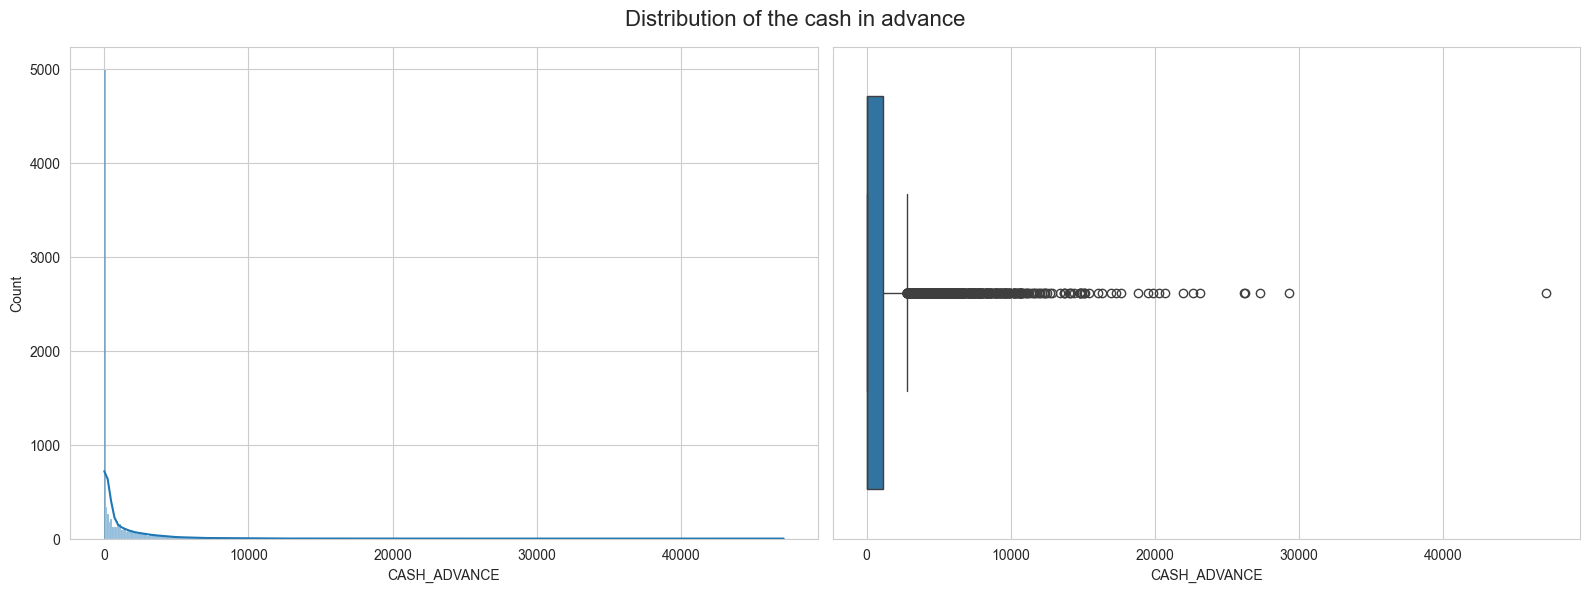

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the cash in advance', fontsize=16)

sns.histplot(data=df, x = "CASH_ADVANCE", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "CASH_ADVANCE", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [27]:
zero_cash_advance_values = df["CASH_ADVANCE"] == 0
zero_cash_advance_occurence = zero_cash_advance_values.any()
print(zero_cash_advance_occurence)

True


In [28]:
zero_cash_advance_values_count = df["CASH_ADVANCE"] == 0
zero_cash_advance_values_sum = zero_cash_advance_values_count.sum()
print(f"Number of zero values: {zero_cash_advance_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_cash_advance_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 4628
Number of rows: 8950
Percentage of zero values: 51.71%


Maximum amount of one-time purchase

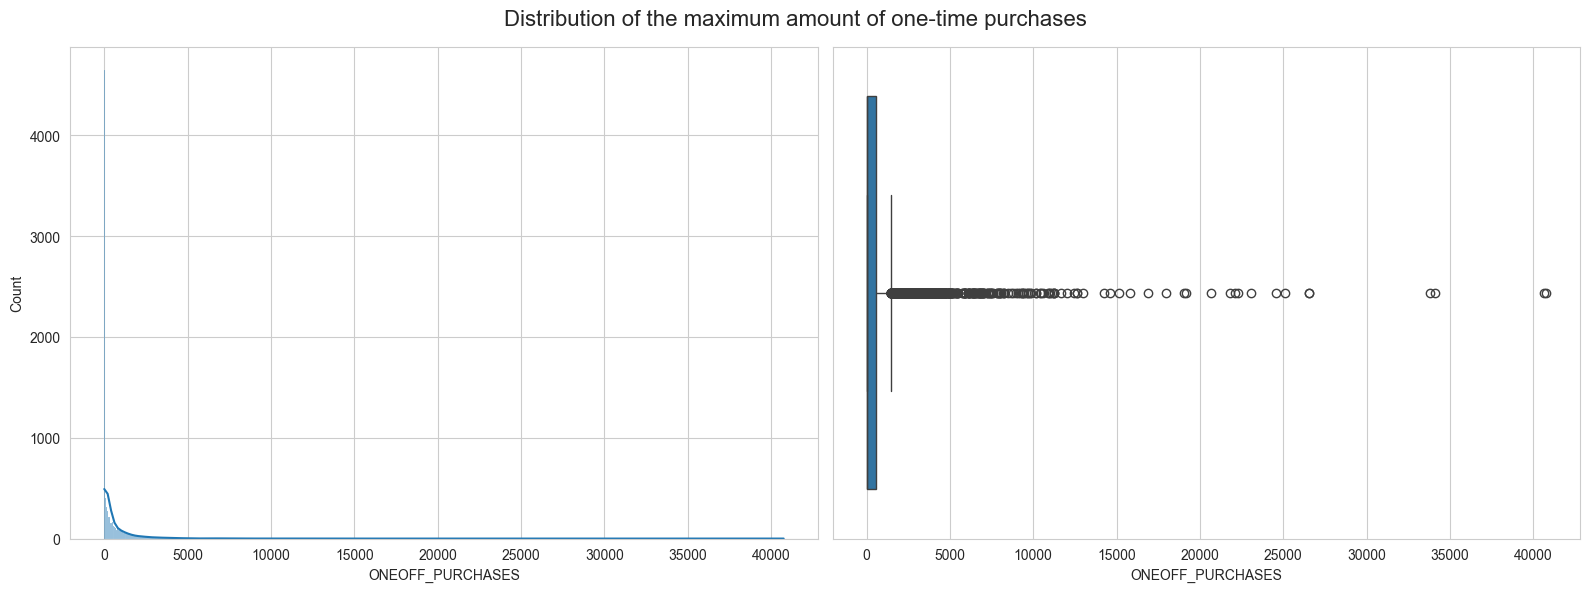

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the maximum amount of one-time purchases', fontsize=16)

sns.histplot(data=df, x = "ONEOFF_PURCHASES", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "ONEOFF_PURCHASES", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [30]:
zero_one_off_purchases_values = df["ONEOFF_PURCHASES"] == 0
zero_one_off_purchases_occurence = zero_one_off_purchases_values.any()
print(zero_one_off_purchases_occurence)

True


In [31]:
zero_one_off_purchases_values_count = df["ONEOFF_PURCHASES"] == 0
zero_one_off_purchases_values_sum = zero_one_off_purchases_values_count.sum()
print(f"Number of zero values: {zero_one_off_purchases_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_one_off_purchases_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 4302
Number of rows: 8950
Percentage of zero values: 48.07%


Credit limit of the customer

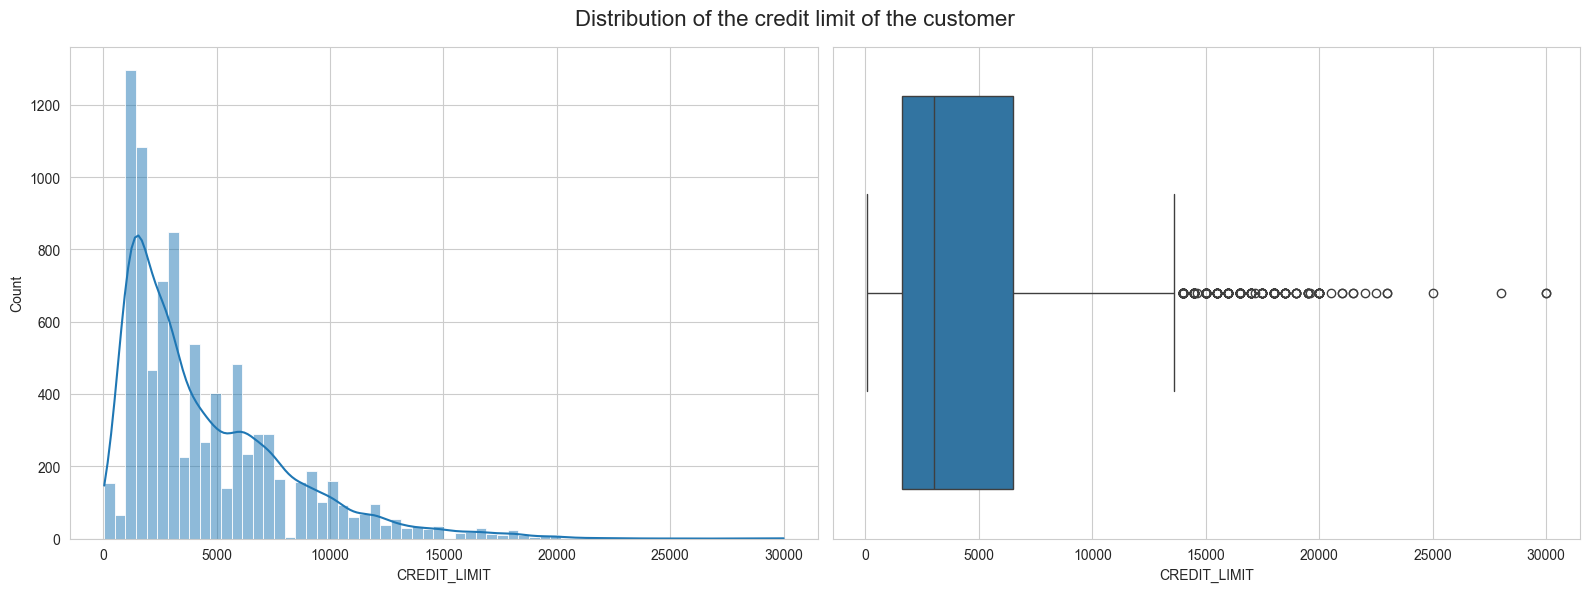

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the credit limit of the customer', fontsize=16)

sns.histplot(data=df, x = "CREDIT_LIMIT", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "CREDIT_LIMIT", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [33]:
zero_credit_limit_values = df["CREDIT_LIMIT"] == 0
zero_credit_limit_occurence = zero_credit_limit_values.any()
print(zero_credit_limit_occurence)

False


In [34]:
zero_credit_limit_values_count = df["CREDIT_LIMIT"] == 0
zero_credit_limit_values_sum = zero_credit_limit_values_count.sum()
print(f"Number of zero values: {zero_credit_limit_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_credit_limit_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 0
Number of rows: 8950
Percentage of zero values: 0.00%


Number of transactions on purchases

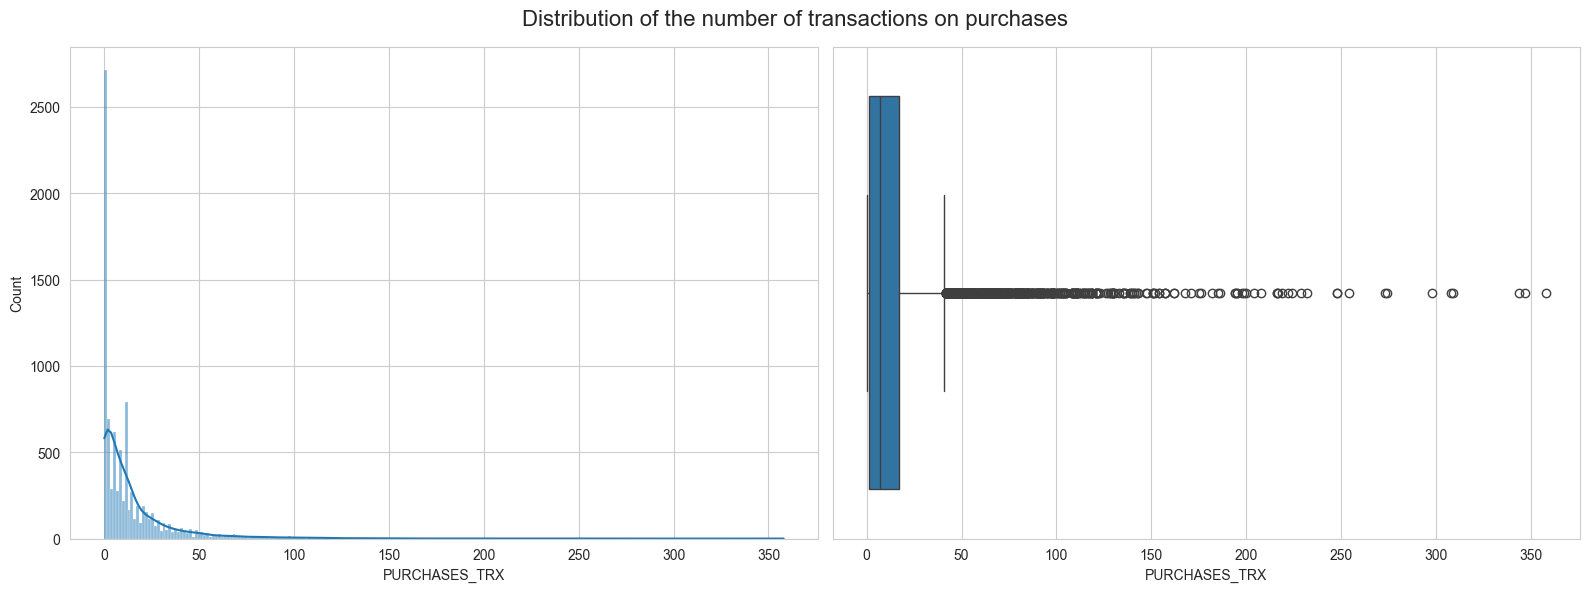

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the number of transactions on purchases', fontsize=16)

sns.histplot(data=df, x = "PURCHASES_TRX", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PURCHASES_TRX", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [36]:
zero_purchase_transactions_values = df["PURCHASES_TRX"] == 0
zero_purchase_transactions_occurence = zero_purchase_transactions_values.any()
print(zero_purchase_transactions_occurence)

True


In [37]:
zero_purchase_transactions_values_count = df["PURCHASES_TRX"] == 0
zero_purchase_transactions_values_sum = zero_purchase_transactions_values_count.sum()
print(f"Number of zero values: {zero_purchase_transactions_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_purchase_transactions_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 2044
Number of rows: 8950
Percentage of zero values: 22.84%


Number of cash in advance transactions

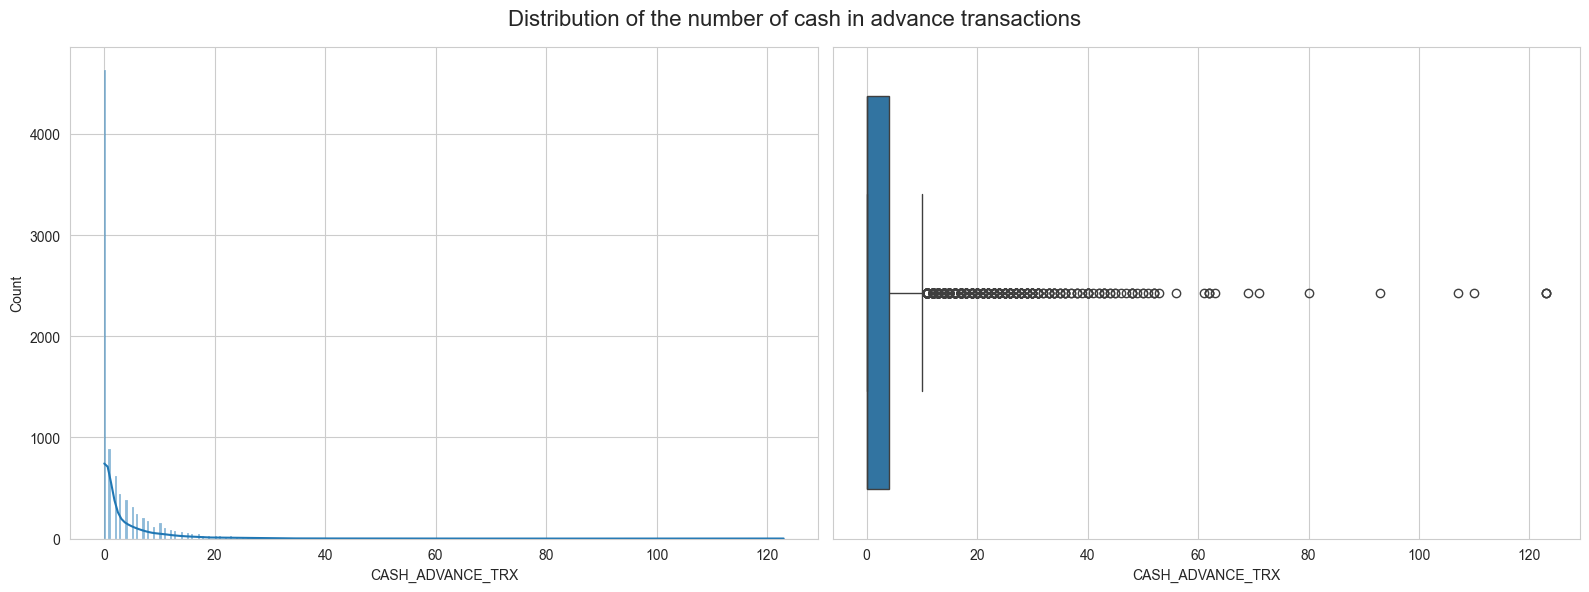

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the number of cash in advance transactions', fontsize=16)

sns.histplot(data=df, x = "CASH_ADVANCE_TRX", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "CASH_ADVANCE_TRX", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [39]:
zero_cash_advance_transactions_values = df["CASH_ADVANCE_TRX"] == 0
zero_cash_advance_transactions_occurence = zero_cash_advance_transactions_values.any()
print(zero_cash_advance_transactions_occurence)

True


In [40]:
zero_cash_advance_transactions_values_count = df["CASH_ADVANCE_TRX"] == 0
zero_cash_advance_transactions_values_sum = zero_cash_advance_transactions_values_count.sum()
print(f"Number of zero values: {zero_cash_advance_transactions_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_cash_advance_transactions_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 4628
Number of rows: 8950
Percentage of zero values: 51.71%


Frequency of cash in advance payments

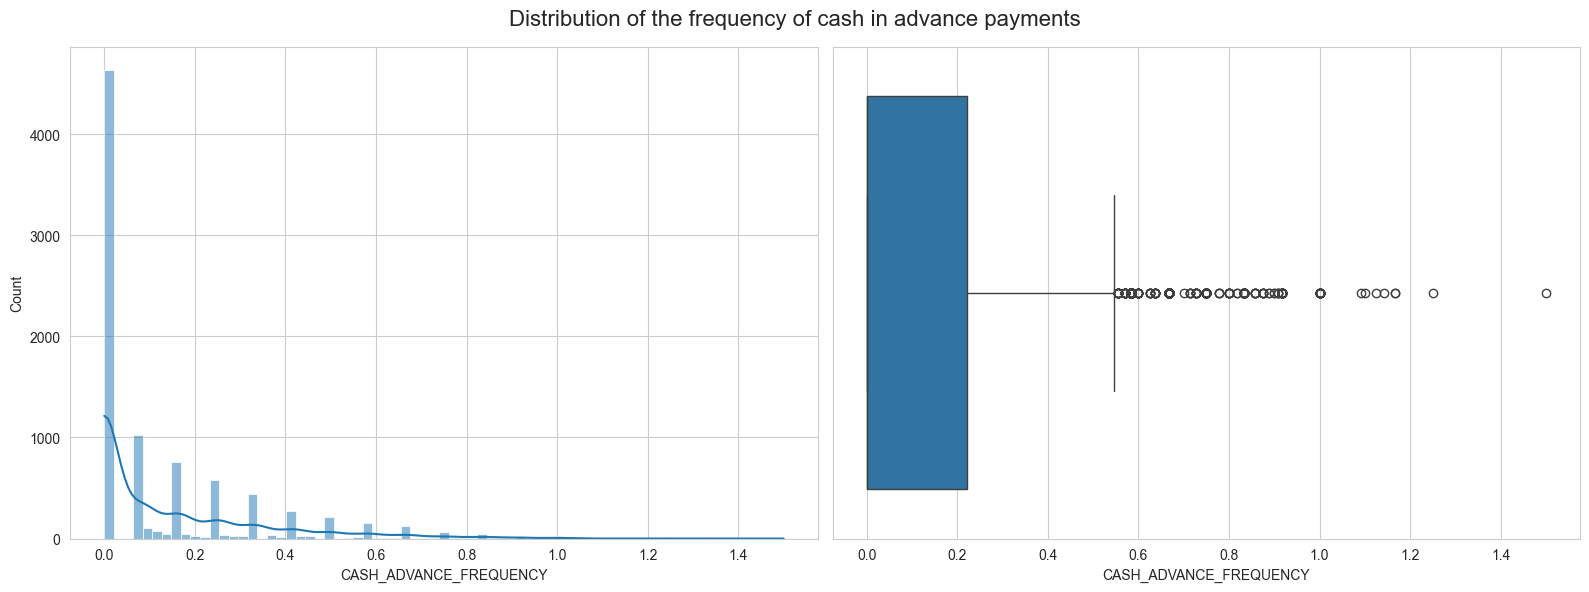

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the frequency of cash in advance payments', fontsize=16)

sns.histplot(data=df, x = "CASH_ADVANCE_FREQUENCY", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "CASH_ADVANCE_FREQUENCY", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [42]:
zero_cash_advance_frequency_values = df["CASH_ADVANCE_FREQUENCY"] == 0
zero_cash_advance_frequency_occurence = zero_cash_advance_frequency_values.any()
print(zero_cash_advance_frequency_occurence)

True


In [43]:
zero_cash_advance_frequency_values_count = df["CASH_ADVANCE_FREQUENCY"] == 0
zero_cash_advance_frequency_values_sum = zero_cash_advance_frequency_values_count.sum()
print(f"Number of zero values: {zero_cash_advance_frequency_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_cash_advance_frequency_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 4628
Number of rows: 8950
Percentage of zero values: 51.71%


Percentage of full payment made by the customer

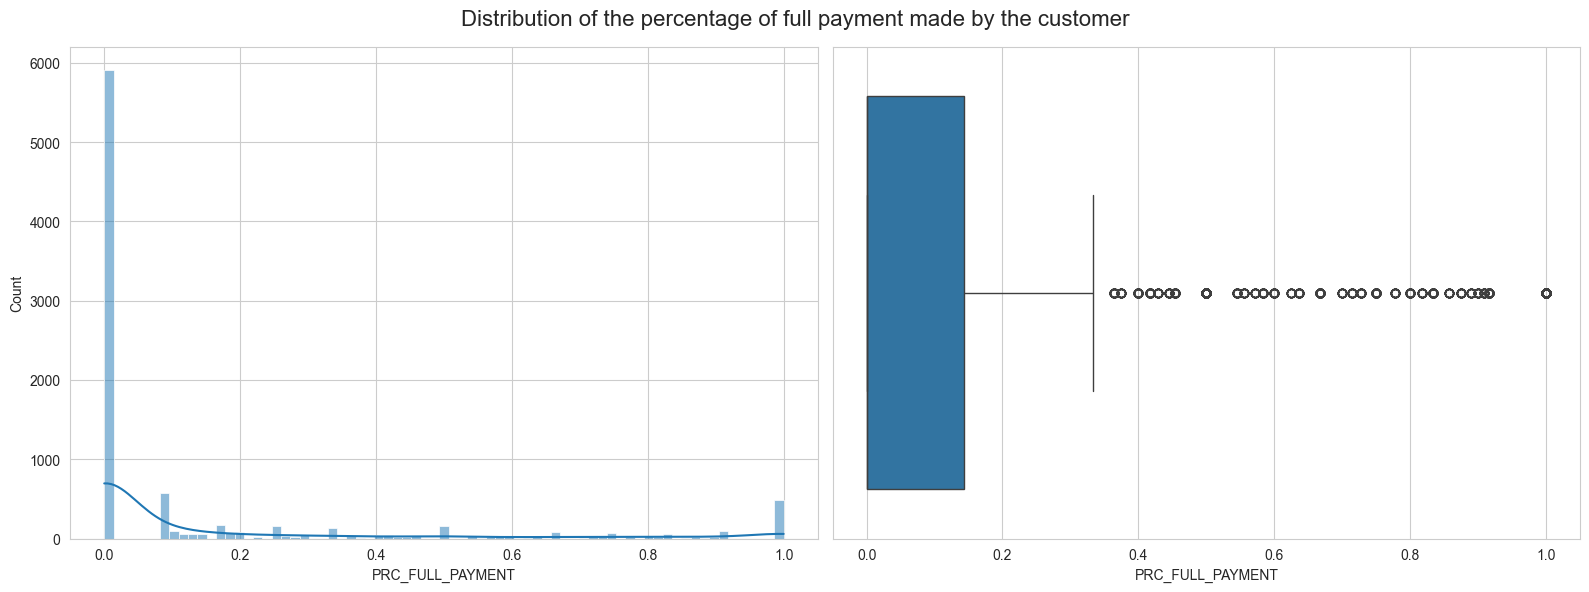

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the percentage of full payment made by the customer', fontsize=16)

sns.histplot(data=df, x = "PRC_FULL_PAYMENT", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PRC_FULL_PAYMENT", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [45]:
zero_full_payment_perc_values = df["PRC_FULL_PAYMENT"] == 0
zero_full_payment_perc_occurence = zero_full_payment_perc_values.any()
print(zero_full_payment_perc_occurence)

True


In [46]:
zero_full_payment_perc_values_count = df["PRC_FULL_PAYMENT"] == 0
zero_full_payment_perc_values_sum = zero_full_payment_perc_values_count.sum()
print(f"Number of zero values: {zero_full_payment_perc_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_full_payment_perc_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 5903
Number of rows: 8950
Percentage of zero values: 65.96%


Frequency of purchases on installments

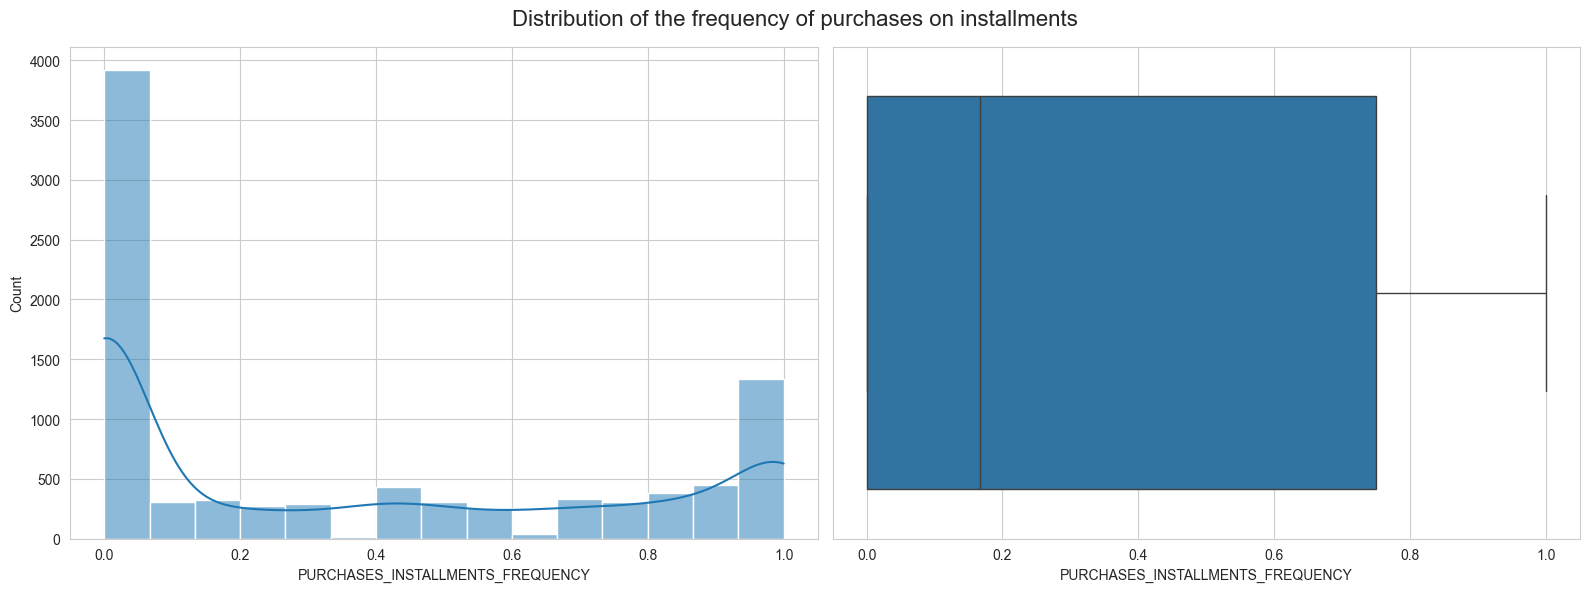

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the frequency of purchases on installments', fontsize=16)

sns.histplot(data=df, x = "PURCHASES_INSTALLMENTS_FREQUENCY", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PURCHASES_INSTALLMENTS_FREQUENCY", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [48]:
zero_purchase_installment_frequency_values = df["PURCHASES_INSTALLMENTS_FREQUENCY"] == 0
zero_purchase_installment_frequency_occurence = zero_purchase_installment_frequency_values.any()
print(zero_purchase_installment_frequency_occurence)

True


In [49]:
zero_purchase_installment_frequency_values_count = df["PURCHASES_INSTALLMENTS_FREQUENCY"] == 0
zero_purchase_installment_frequency_values_sum = zero_purchase_installment_frequency_values_count.sum()
print(f"Number of zero values: {zero_purchase_installment_frequency_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_purchase_installment_frequency_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 3915
Number of rows: 8950
Percentage of zero values: 43.74%


Frequency of one-time payment purchases

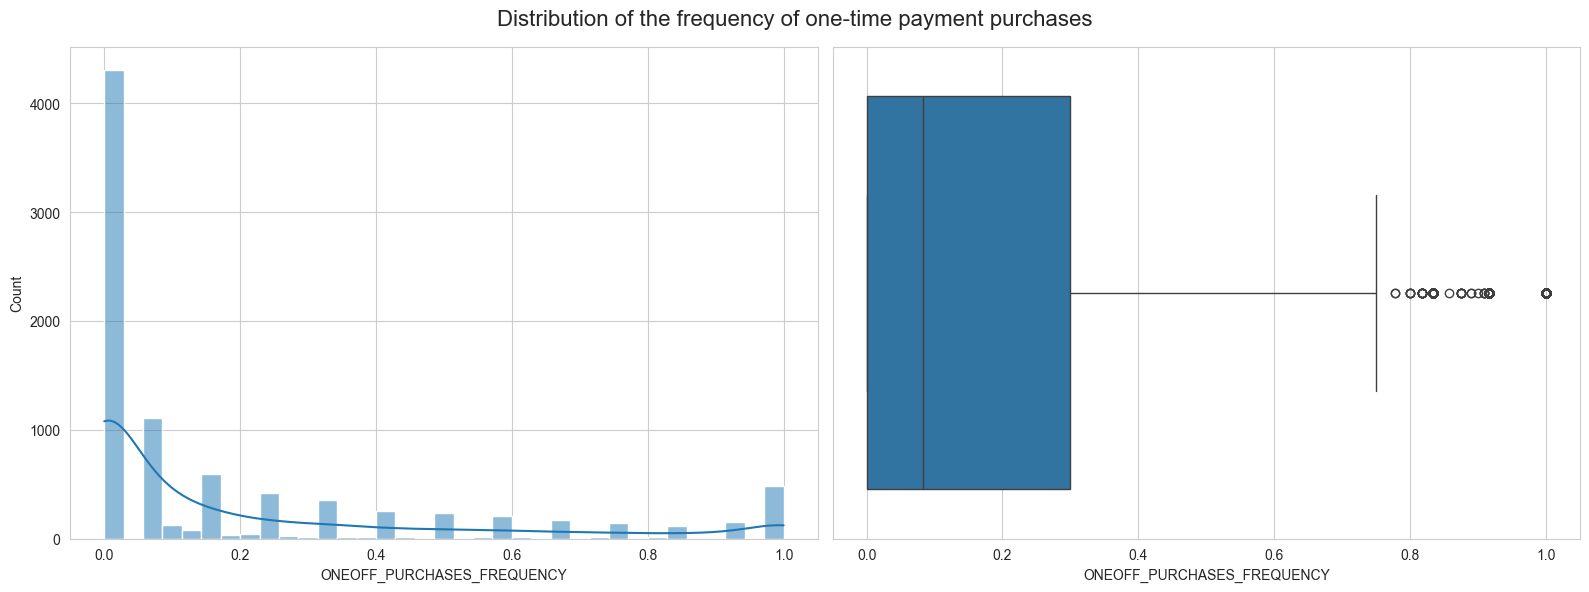

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the frequency of one-time payment purchases', fontsize=16)

sns.histplot(data=df, x = "ONEOFF_PURCHASES_FREQUENCY", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "ONEOFF_PURCHASES_FREQUENCY", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [51]:
zero_one_off_purchase_frequency_values = df["ONEOFF_PURCHASES_FREQUENCY"] == 0
zero_one_off_purchase_frequency_occurence = zero_one_off_purchase_frequency_values.any()
print(zero_one_off_purchase_frequency_occurence)

True


In [52]:
zero_one_off_purchase_frequency_values_count = df["ONEOFF_PURCHASES_FREQUENCY"] == 0
zero_one_off_purchase_frequency_values_sum = zero_one_off_purchase_frequency_values_count.sum()
print(f"Number of zero values: {zero_one_off_purchase_frequency_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_one_off_purchase_frequency_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 4302
Number of rows: 8950
Percentage of zero values: 48.07%


Frequency of purchases

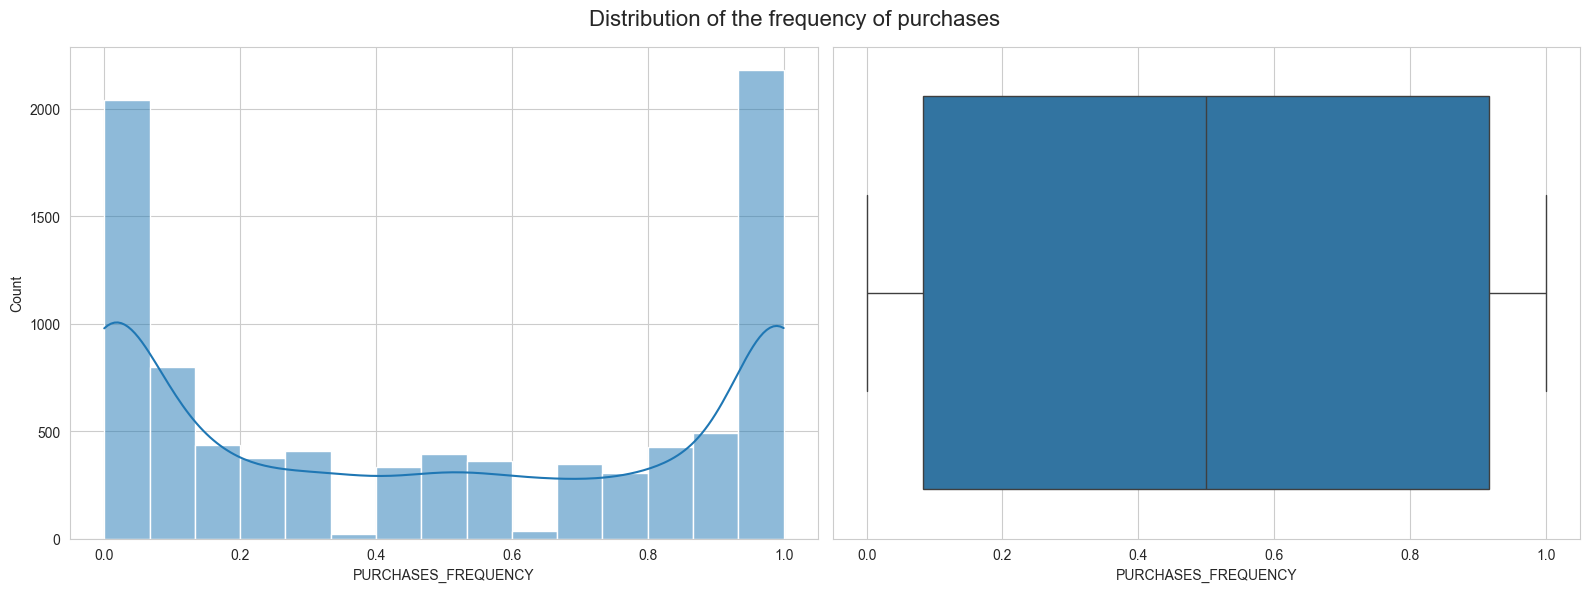

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the frequency of purchases', fontsize=16)

sns.histplot(data=df, x = "PURCHASES_FREQUENCY", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "PURCHASES_FREQUENCY", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [54]:
zero_purchase_frequency_values = df["PURCHASES_FREQUENCY"] == 0
zero_purchase_frequency_occurence = zero_purchase_frequency_values.any()
print(zero_purchase_frequency_occurence)

True


In [55]:
zero_purchase_frequency_values_count = df["PURCHASES_FREQUENCY"] == 0
zero_purchase_frequency_values_sum = zero_purchase_frequency_values_count.sum()
print(f"Number of zero values: {zero_purchase_frequency_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_purchase_frequency_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 2043
Number of rows: 8950
Percentage of zero values: 22.83%


Frequency of balance updates 

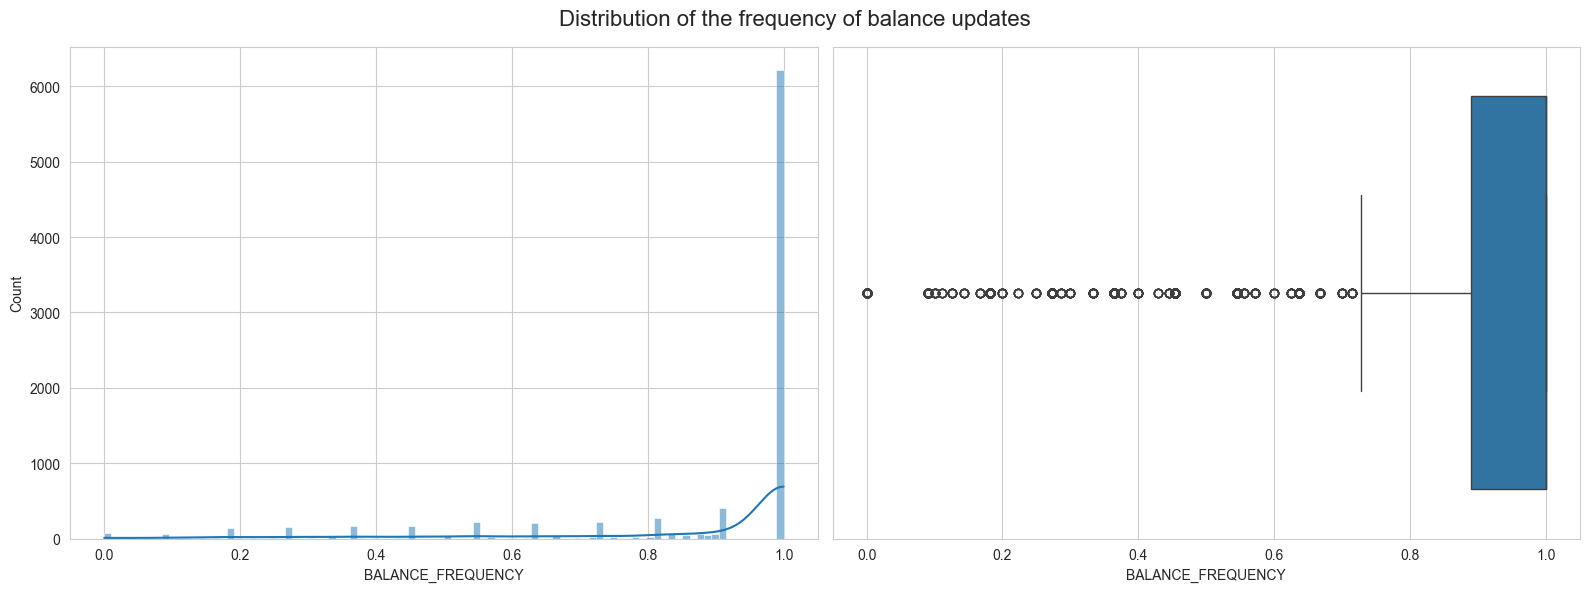

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the frequency of balance updates', fontsize=16)

sns.histplot(data=df, x = "BALANCE_FREQUENCY", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "BALANCE_FREQUENCY", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [57]:
zero_balance_frequency_values = df["BALANCE_FREQUENCY"] == 0
zero_balance_frequency_occurence = zero_balance_frequency_values.any()
print(zero_balance_frequency_occurence)

True


In [58]:
zero_balance_frequency_values_count = df["BALANCE_FREQUENCY"] == 0
zero_balance_frequency_values_sum = zero_balance_frequency_values_count.sum()
print(f"Number of zero values: {zero_balance_frequency_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_balance_frequency_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 80
Number of rows: 8950
Percentage of zero values: 0.89%


The tenure of the credit card service

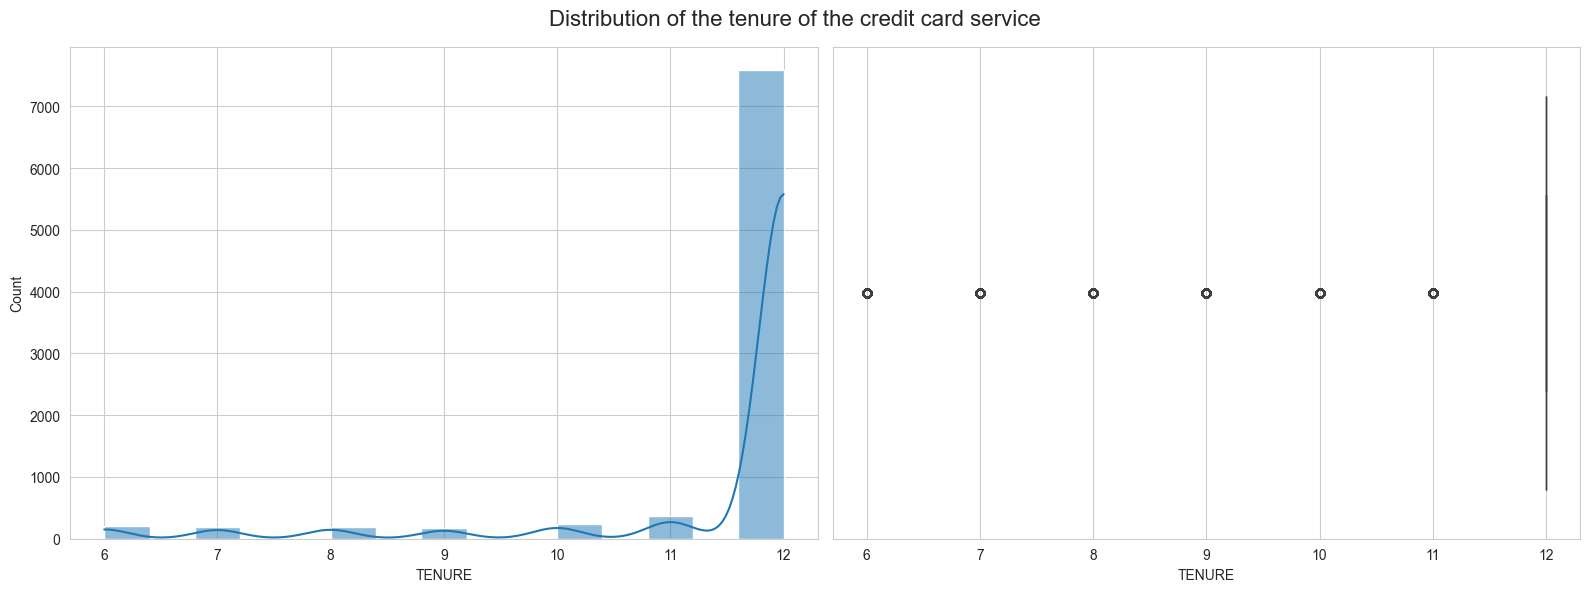

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
fig.suptitle('Distribution of the tenure of the credit card service', fontsize=16)

sns.histplot(data=df, x = "TENURE", kde = True, ax=axes[0])
sns.boxplot(data=df, x = "TENURE", ax=axes[1])

plt.tight_layout()
plt.show()

Investigating for sparsity

In [60]:
zero_tenure_values = df["TENURE"] == 0
zero_tenure_occurence = zero_tenure_values.any()
print(zero_tenure_occurence)

False


In [61]:
zero_tenure_values_count = df["TENURE"] == 0
zero_tenure_values_sum = zero_tenure_values_count.sum()
print(f"Number of zero values: {zero_tenure_values_sum}")
print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of zero values: {(zero_tenure_values_sum/df.shape[0]) * 100:.2f}%")

Number of zero values: 0
Number of rows: 8950
Percentage of zero values: 0.00%


Multivariate Analysis

Preprocessing for Multivariate Analysis

In [62]:
df_copy = df.copy()

In [63]:
df_copy.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [64]:
df_copy.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [65]:
sparse_skewed_features = [
    "PAYMENTS",
    "BALANCE",
    "PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "ONEOFF_PURCHASES",
    "PURCHASES_TRX",
    "CASH_ADVANCE_TRX",
    "CASH_ADVANCE_FREQUENCY",
    "PRC_FULL_PAYMENT",
    "ONEOFF_PURCHASES_FREQUENCY",
    "BALANCE_FREQUENCY",
]

sparse_features = [
    "TENURE"
]

skewed_features = [
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "PURCHASES_FREQUENCY",
]

missing_value_features = [
    "CREDIT_LIMIT"
]

missing_value_skewed_features = [
    "MINIMUM_PAYMENTS"
]

In [66]:
df_transformed, _ = preprocess_training_set(
    df_copy,
    missing_value_features=missing_value_features,
    missing_value_skewed_features=missing_value_skewed_features,
    sparse_skewed_features=sparse_skewed_features,
    sparse_features=sparse_features,
    skewed_features=skewed_features,
)

In [67]:
df_transformed

,CUST_ID,MINIMUM_PAYMENTS_imputed_stabilized,CREDIT_LIMIT_imputed,PAYMENTS_stabilized_weighted,BALANCE_stabilized_weighted,PURCHASES_stabilized_weighted,INSTALLMENTS_PURCHASES_stabilized_weighted,CASH_ADVANCE_stabilized_weighted,ONEOFF_PURCHASES_stabilized_weighted,PURCHASES_TRX_stabilized_weighted,CASH_ADVANCE_TRX_stabilized_weighted,CASH_ADVANCE_FREQUENCY_stabilized_weighted,PRC_FULL_PAYMENT_stabilized_weighted,ONEOFF_PURCHASES_FREQUENCY_stabilized_weighted,BALANCE_FREQUENCY_stabilized_weighted,TENURE_weighted,PURCHASES_INSTALLMENTS_FREQUENCY_stabilized,PURCHASES_FREQUENCY_stabilized
0,C10001,-0.849237,-0.960433,-0.852681,-1.211067,-0.151637,0.360331,-0.926888,-0.980353,-0.742761,-0.711229,0.761741,0.346157,0.557538,-0.193373,0.360680,-0.723206,-0.841791
1,C10002,0.877661,0.688639,1.082527,0.947337,-1.661982,-1.081176,1.548417,-0.980353,-1.236424,0.661630,-0.885892,-1.620024,0.557538,0.162542,0.360680,-0.876139,-1.148659
2,C10003,0.435065,0.826062,-0.125007,0.825181,0.603149,-1.081176,-0.926888,1.066708,0.458593,-0.711229,0.761741,0.346157,1.610543,0.501768,0.360680,-0.876139,1.332078
3,C10004,0.700539,0.826062,-4.046748,0.627187,0.840176,-1.081176,0.538815,1.280916,-1.077443,-0.472374,-1.735879,0.346157,-1.755047,-0.962432,0.360680,-0.876139,-1.000657
4,C10005,-0.361555,-0.905464,-0.069224,0.276373,-0.789994,-1.081176,-0.926888,-0.192314,-1.077443,-0.711229,0.761741,0.346157,-1.755047,0.501768,0.360680,-0.876139,-1.000657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-1.778788,-0.960433,-0.542974,-1.389120,0.251598,0.745188,-0.926888,-0.980353,-0.046865,-0.711229,0.761741,-0.278776,0.557538,0.501768,-4.122768,1.151186,1.332078
8946,C19187,0.700539,-0.960433,-0.650218,-1.582026,0.262440,0.755536,-0.926888,-0.980353,-0.046865,-0.711229,0.761741,0.346157,0.557538,0.501768,-4.122768,1.151186,1.332078
8947,C19188,-1.312930,-0.960433,-1.442336,-1.485491,-0.001741,0.503396,-0.926888,-0.980353,-0.173121,-0.711229,0.761741,-1.472736,0.557538,-0.132827,-4.122768,0.658184,0.813307
8948,C19189,-1.661075,-1.097856,-1.724472,-1.752183,-1.661982,-1.081176,0.027696,-0.980353,-1.236424,0.030454,-1.295570,-1.472736,0.557538,-0.132827,-4.122768,-0.876139,-1.148659


In [68]:
df_transformed.drop(columns="CUST_ID", inplace=True)
df_transformed

,MINIMUM_PAYMENTS_imputed_stabilized,CREDIT_LIMIT_imputed,PAYMENTS_stabilized_weighted,BALANCE_stabilized_weighted,PURCHASES_stabilized_weighted,INSTALLMENTS_PURCHASES_stabilized_weighted,CASH_ADVANCE_stabilized_weighted,ONEOFF_PURCHASES_stabilized_weighted,PURCHASES_TRX_stabilized_weighted,CASH_ADVANCE_TRX_stabilized_weighted,CASH_ADVANCE_FREQUENCY_stabilized_weighted,PRC_FULL_PAYMENT_stabilized_weighted,ONEOFF_PURCHASES_FREQUENCY_stabilized_weighted,BALANCE_FREQUENCY_stabilized_weighted,TENURE_weighted,PURCHASES_INSTALLMENTS_FREQUENCY_stabilized,PURCHASES_FREQUENCY_stabilized
0,-0.849237,-0.960433,-0.852681,-1.211067,-0.151637,0.360331,-0.926888,-0.980353,-0.742761,-0.711229,0.761741,0.346157,0.557538,-0.193373,0.360680,-0.723206,-0.841791
1,0.877661,0.688639,1.082527,0.947337,-1.661982,-1.081176,1.548417,-0.980353,-1.236424,0.661630,-0.885892,-1.620024,0.557538,0.162542,0.360680,-0.876139,-1.148659
2,0.435065,0.826062,-0.125007,0.825181,0.603149,-1.081176,-0.926888,1.066708,0.458593,-0.711229,0.761741,0.346157,1.610543,0.501768,0.360680,-0.876139,1.332078
3,0.700539,0.826062,-4.046748,0.627187,0.840176,-1.081176,0.538815,1.280916,-1.077443,-0.472374,-1.735879,0.346157,-1.755047,-0.962432,0.360680,-0.876139,-1.000657
4,-0.361555,-0.905464,-0.069224,0.276373,-0.789994,-1.081176,-0.926888,-0.192314,-1.077443,-0.711229,0.761741,0.346157,-1.755047,0.501768,0.360680,-0.876139,-1.000657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.778788,-0.960433,-0.542974,-1.389120,0.251598,0.745188,-0.926888,-0.980353,-0.046865,-0.711229,0.761741,-0.278776,0.557538,0.501768,-4.122768,1.151186,1.332078
8946,0.700539,-0.960433,-0.650218,-1.582026,0.262440,0.755536,-0.926888,-0.980353,-0.046865,-0.711229,0.761741,0.346157,0.557538,0.501768,-4.122768,1.151186,1.332078
8947,-1.312930,-0.960433,-1.442336,-1.485491,-0.001741,0.503396,-0.926888,-0.980353,-0.173121,-0.711229,0.761741,-1.472736,0.557538,-0.132827,-4.122768,0.658184,0.813307
8948,-1.661075,-1.097856,-1.724472,-1.752183,-1.661982,-1.081176,0.027696,-0.980353,-1.236424,0.030454,-1.295570,-1.472736,0.557538,-0.132827,-4.122768,-0.876139,-1.148659


Correlation Analysis

Pearson's Correlation on processed dataset

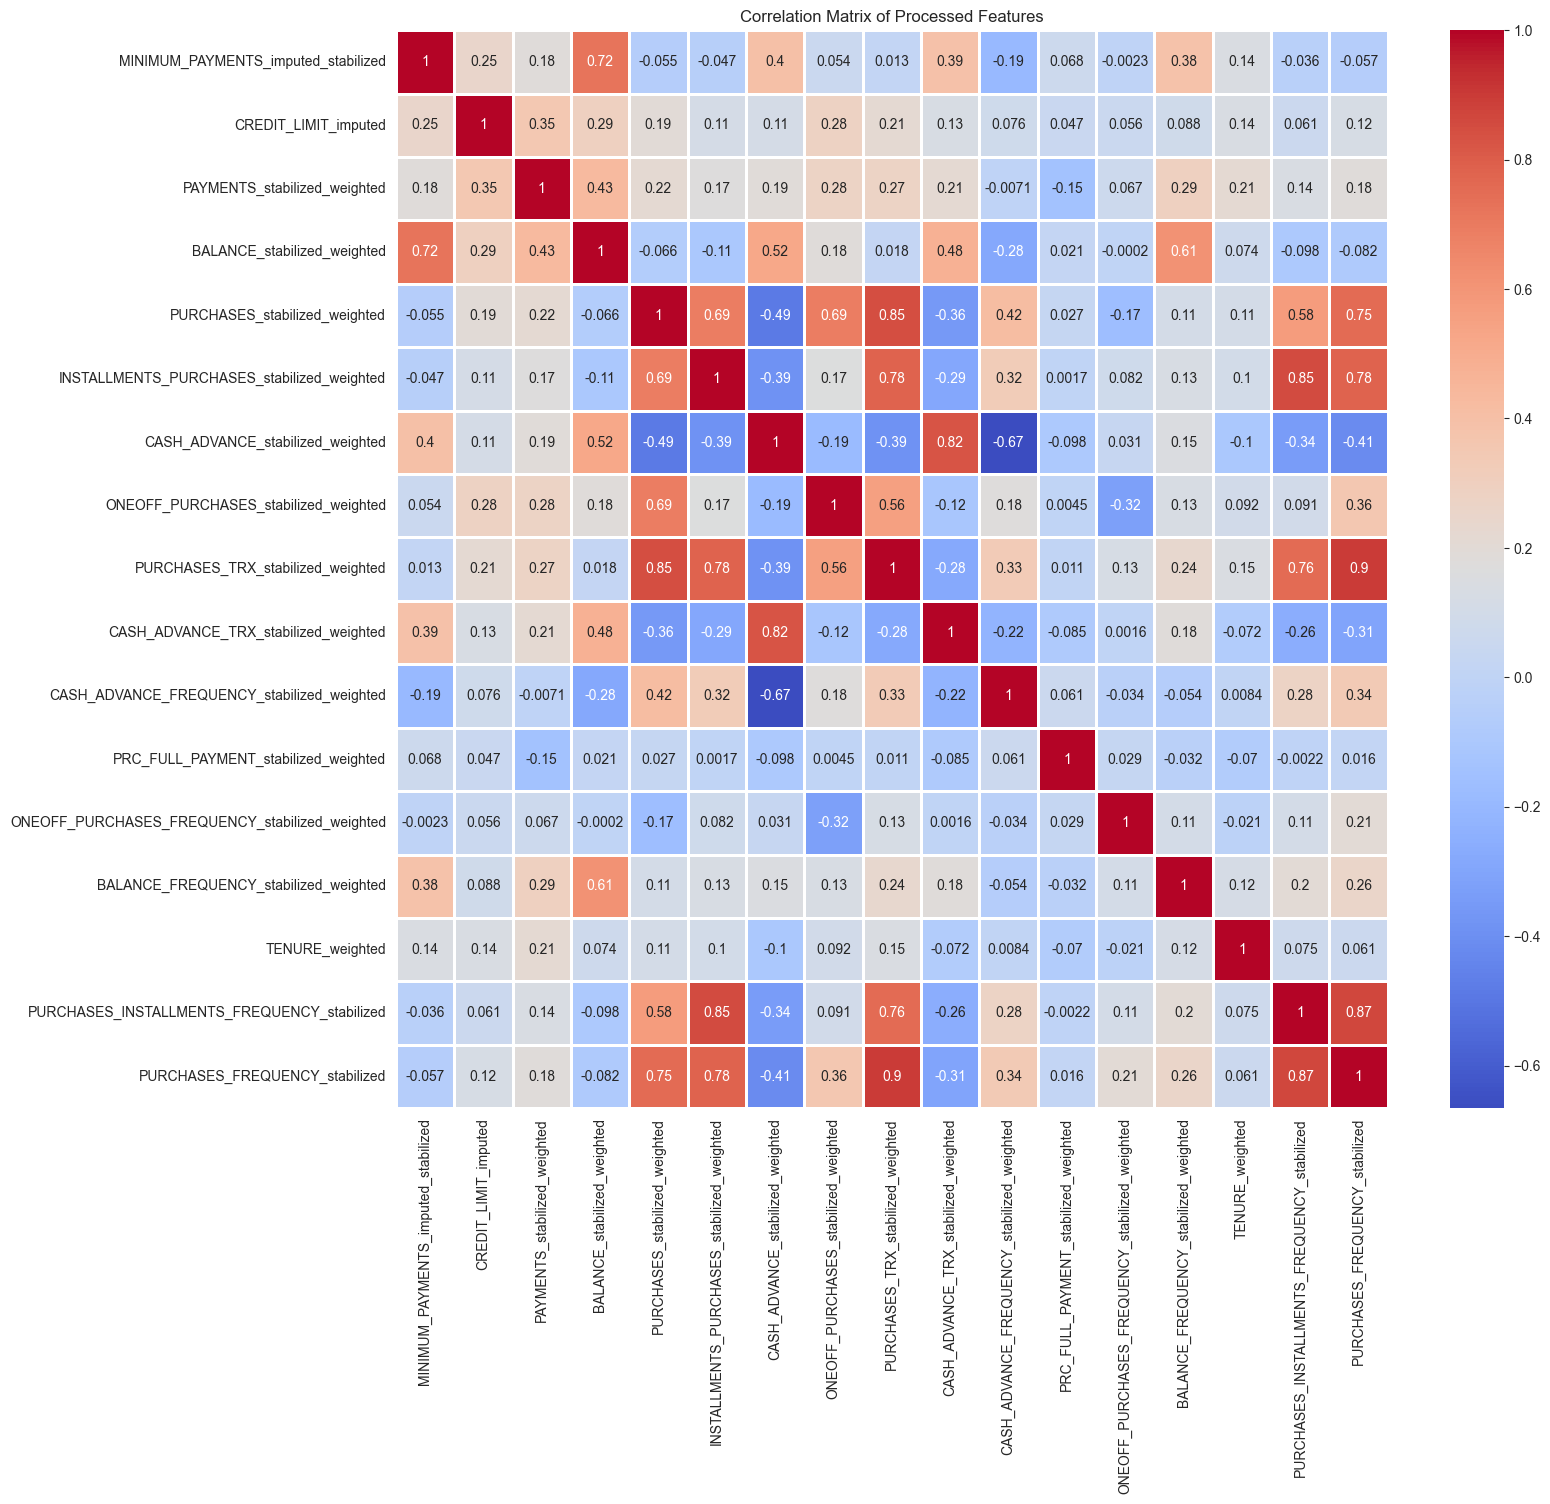

In [69]:
pearson_corr = df_transformed.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(pearson_corr, annot=True, linewidths=1, cmap="coolwarm")
plt.title('Correlation Matrix of Processed Features')
plt.show()

Spearman's Rank Correlation on unprocessed dataset

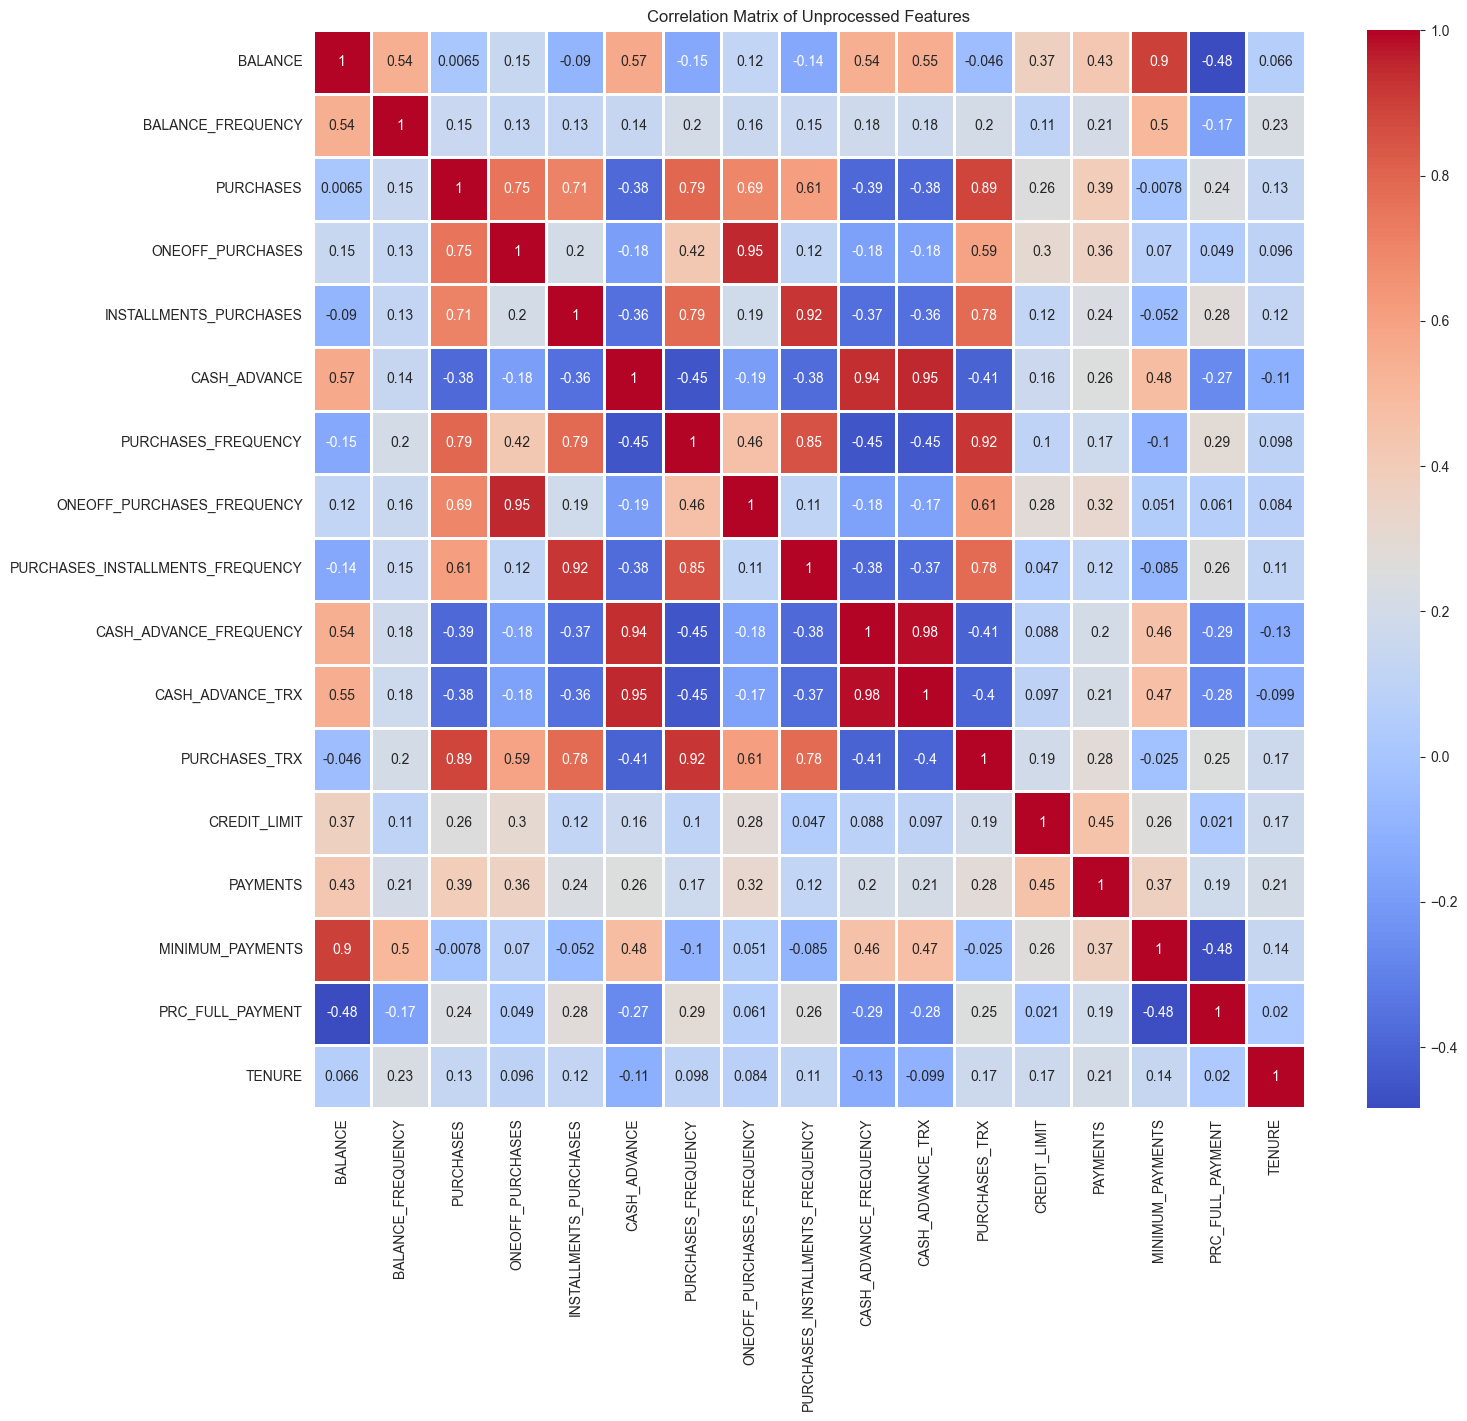

In [70]:
spearman_corr = df_copy[[feature for feature in df_copy.columns if feature != "CUST_ID"]].corr(method="spearman")
plt.figure(figsize=(16, 14))
sns.heatmap(spearman_corr, annot=True, linewidths=1, cmap="coolwarm")
plt.title('Correlation Matrix of Unprocessed Features')
plt.show()

Mutual Information Analysis

In [71]:
def mutual_info(df, n_bins=10):
    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    df_discrete = pd.DataFrame(discretizer.fit_transform(df), columns=df.columns)
    
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                mi_score = mutual_info_regression(df_discrete[[col1]], df_discrete[col2])
                mi_matrix.loc[col1, col2] = mi_score[0]
            else:
                mi_matrix.loc[col1, col2] = 0 
    
    return mi_matrix

In [72]:
processed_mi_matrix = mutual_info(df_transformed)
unprocessed_mi_matrix = mutual_info(df_copy[[feature for feature in df_copy.columns if feature  != "CUST_ID"]].dropna())

Mutual Information between processed features

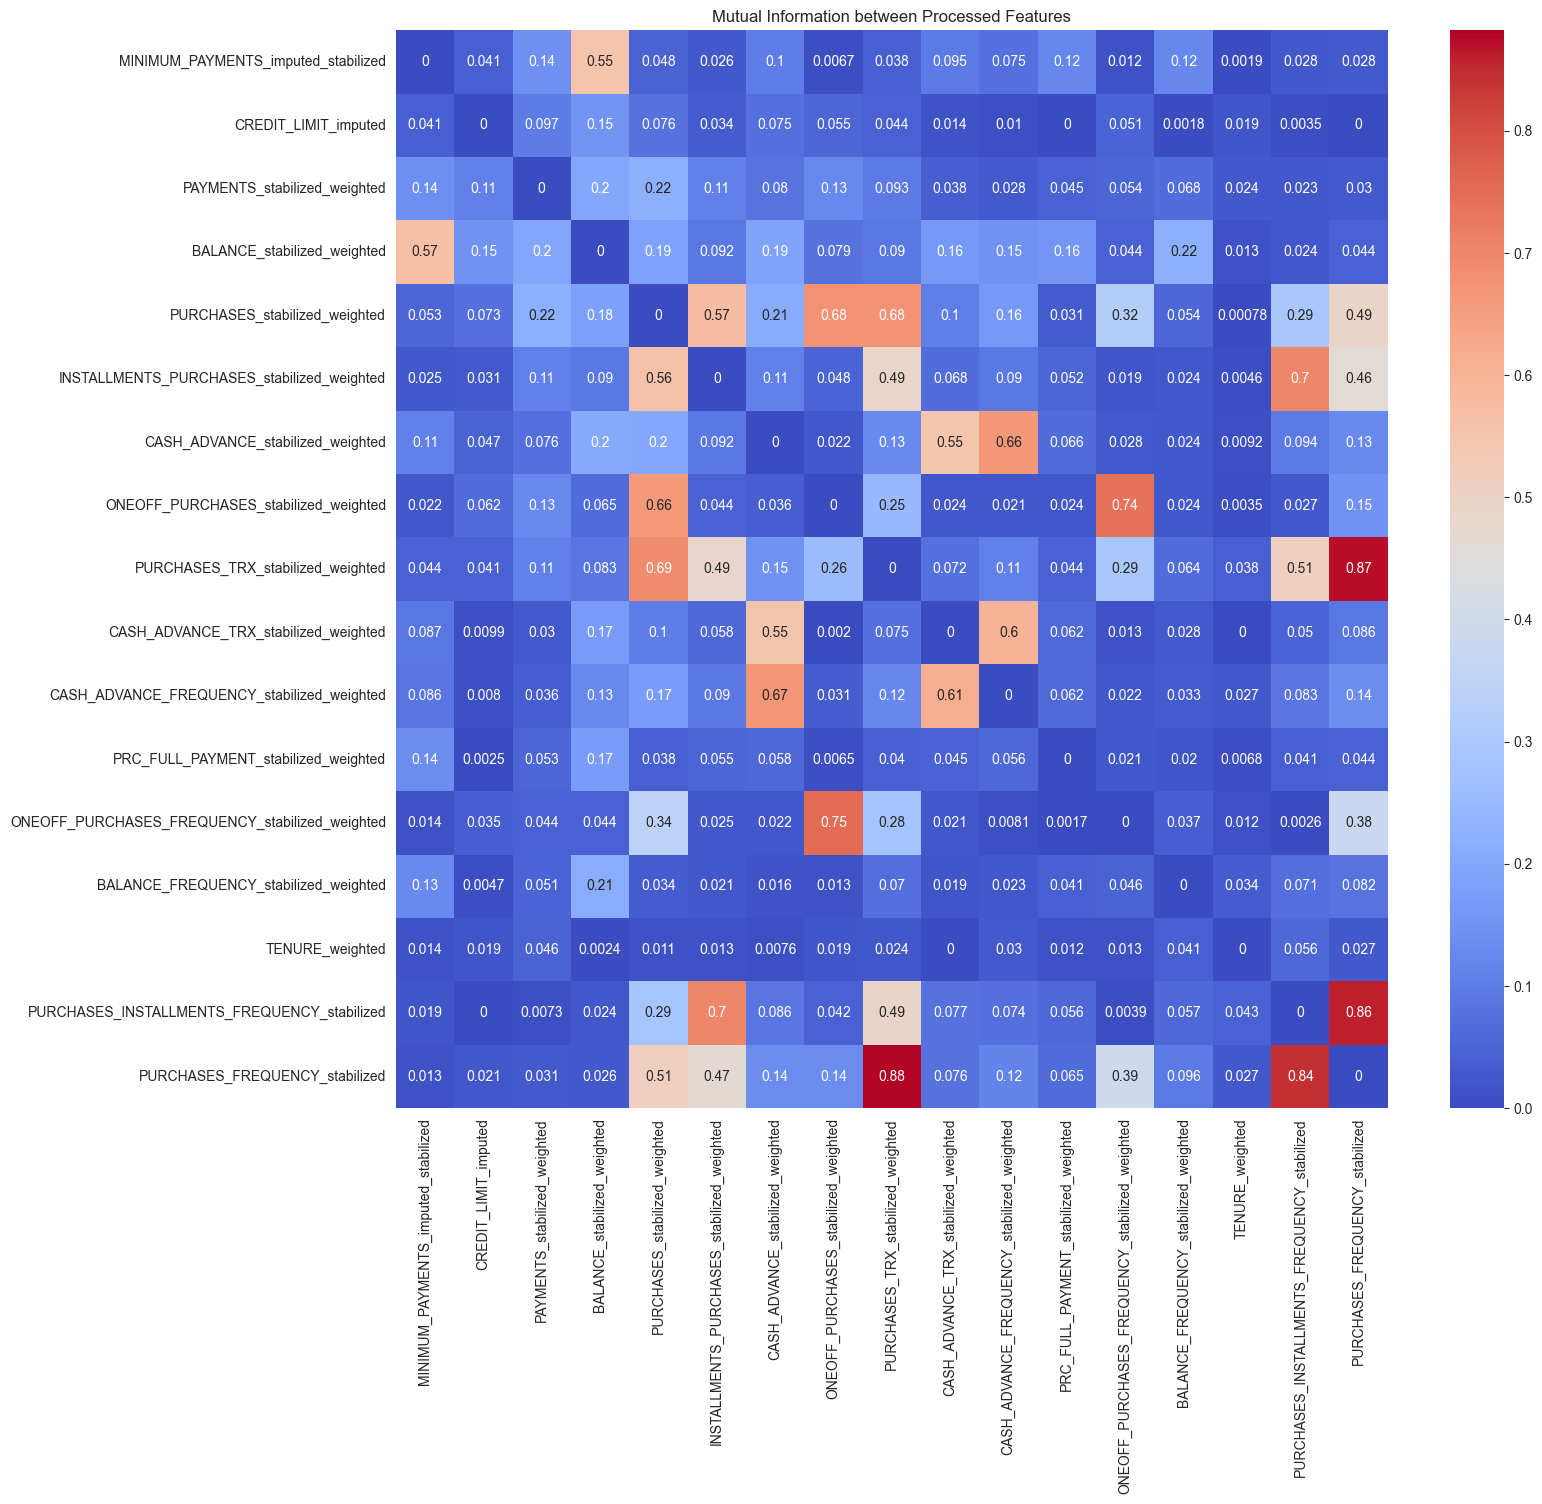

In [73]:
plt.figure(figsize=(16, 14))
sns.heatmap(processed_mi_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Mutual Information between Processed Features')
plt.show()

Mutual Information between unprocessed features

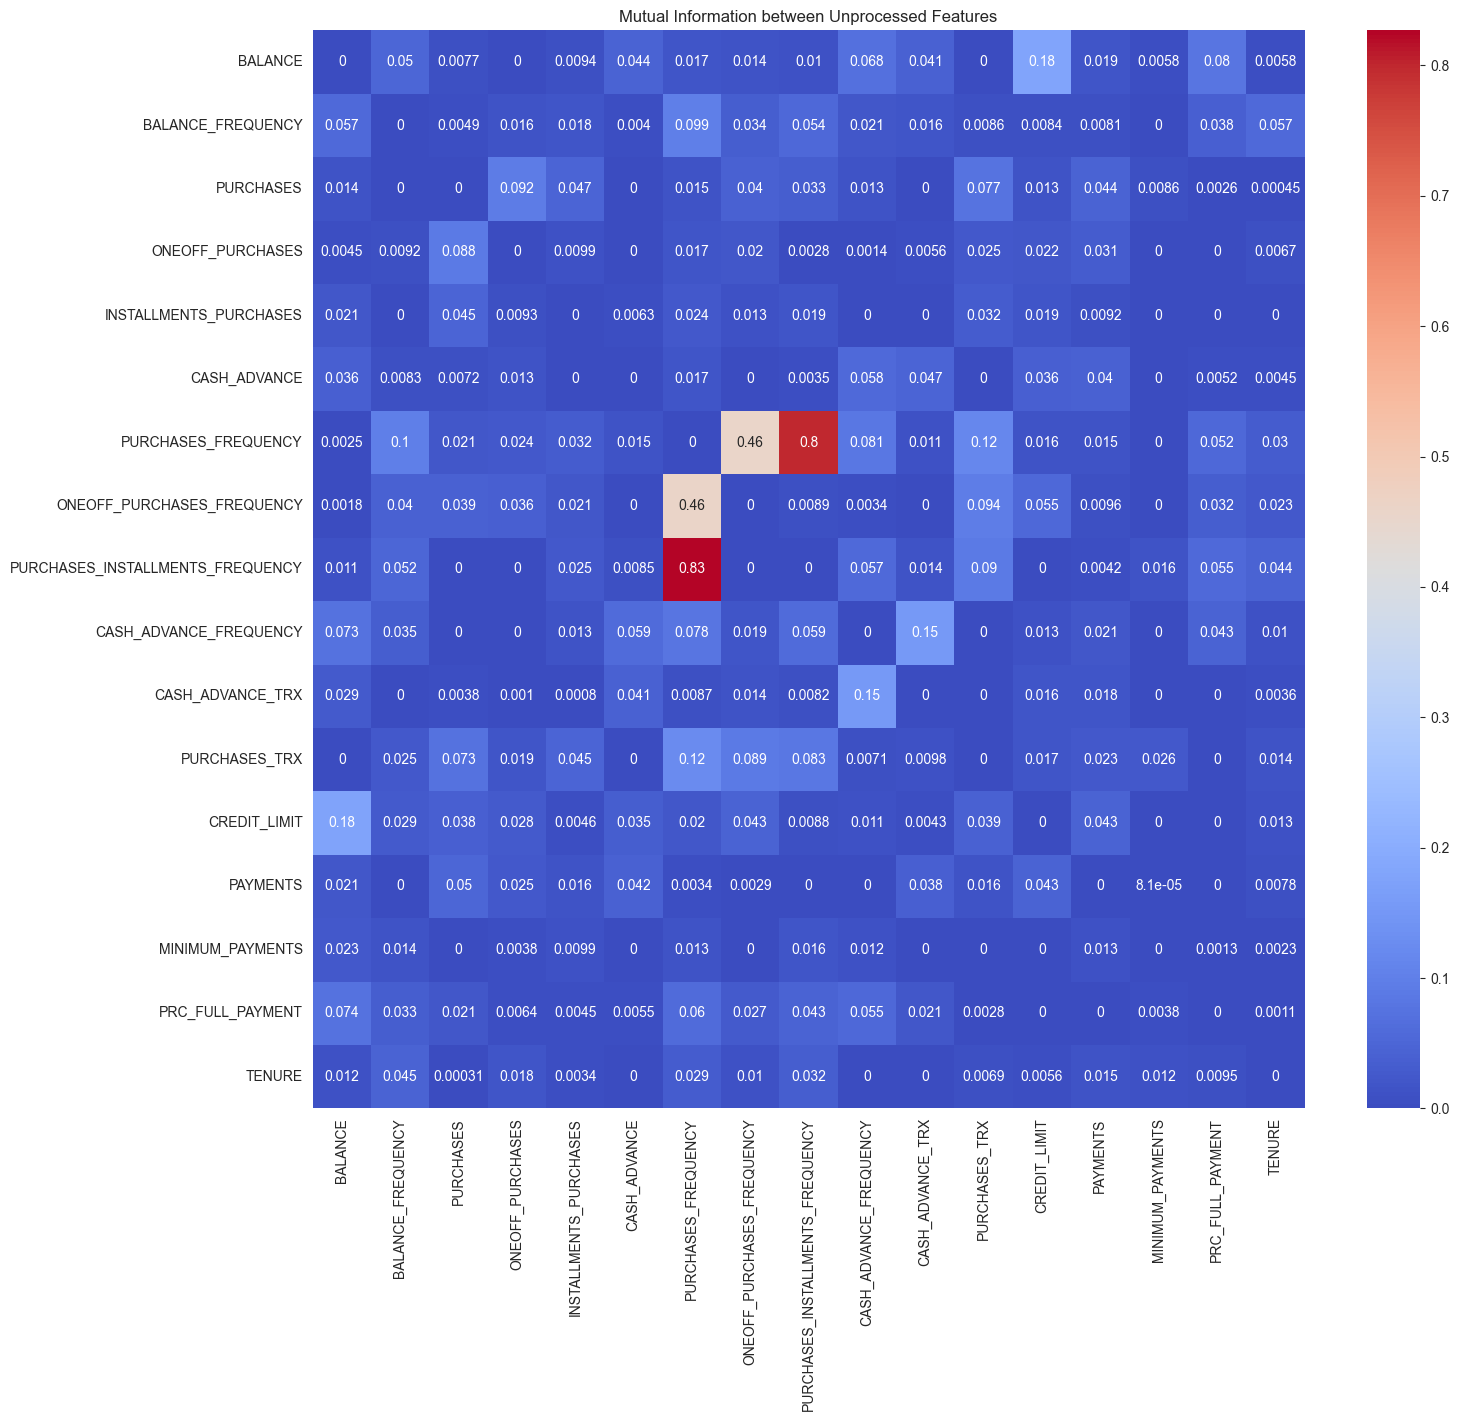

In [74]:
plt.figure(figsize=(16, 14))
sns.heatmap(unprocessed_mi_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Mutual Information between Unprocessed Features')
plt.show()

PCA for preliminary visualization on unprocessed data

In [75]:
pca = PCA(n_components=2)

<Axes: >

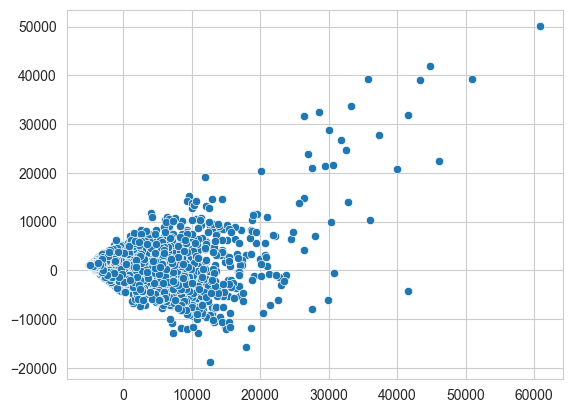

In [76]:
df_raw_pca = pca.fit_transform(df_copy[[feature for feature in df_copy.columns if feature  != "CUST_ID"]].dropna())
sns.scatterplot(x=df_raw_pca[:, 0], y=df_raw_pca[:, 1])

PCA for preliminary visualization on processed data

<Axes: >

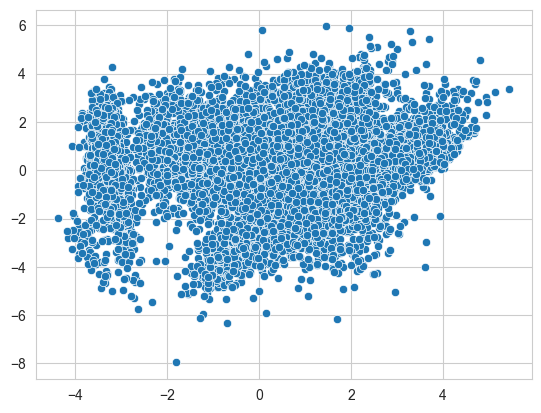

In [77]:
df_processed_pca = pca.fit_transform(df_transformed)
sns.scatterplot(x=df_processed_pca[:, 0], y=df_processed_pca[:, 1])